Financial Profile 
1.  Does higher account balance increase likelihood of subscription?

#Insight
- Higher-balance customers show higher subscription rates.
- Targeting high-balance segments may improve campaign efficiency.

In [1]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\mjars\Documents\Learning\DSI\ds_team2_bank_marketing\src\cookiejars8\02. Financial Profile


C:\Users\mjars\AppData\Local\Temp\ipykernel_18356\445233957.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_bin = df.groupby("balance_bin")["subscribed"].mean()


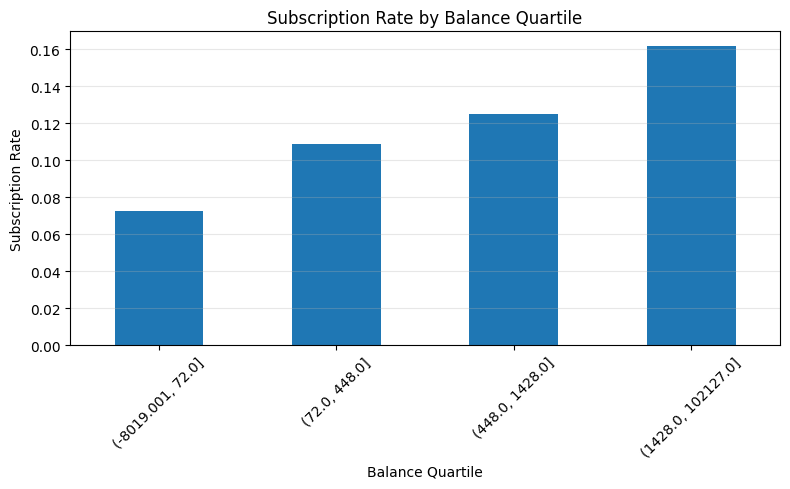

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset (two levels up from this notebook folder)
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert target to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Create balance quartiles
df["balance_bin"] = pd.qcut(df["balance"], q=4, duplicates="drop")

# 4) Calculate subscription rate per quartile
conversion_by_bin = df.groupby("balance_bin")["subscribed"].mean()

# 5) Plot bar chart
plt.figure(figsize=(8, 5))
conversion_by_bin.plot(kind="bar")

plt.title("Subscription Rate by Balance Quartile")
plt.xlabel("Balance Quartile")
plt.ylabel("Subscription Rate")
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# 6) Save inside png_financialprofile folder
plt.savefig("png_financialprofile/01_balance_vs_subscription_rate.png", dpi=300)

plt.show()

2. Does having a housing loan affect subscription probability? 

#Insight
- Customers with housing loans have lower subscription rates.
- Housing loan status may help refine customer targeting.

Subscription rate by housing loan status:
housing
no     0.167024
yes    0.077000
Name: subscribed, dtype: float64


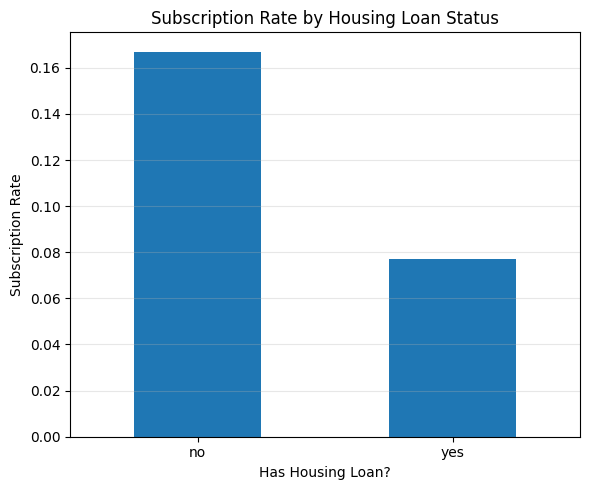

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset (two levels up from this notebook folder)
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert subscription target to numeric (1 = yes, 0 = no)
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Calculate subscription rate grouped by housing loan status
housing_conversion = df.groupby("housing")["subscribed"].mean()

print("Subscription rate by housing loan status:")
print(housing_conversion)

# 4) Create bar chart
plt.figure(figsize=(6, 5))
housing_conversion.plot(kind="bar")

plt.title("Subscription Rate by Housing Loan Status")
plt.xlabel("Has Housing Loan?")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

# 5) Save inside your Financial Profile png folder
plt.savefig("png_financialprofile/02_housing_vs_subscription.png", dpi=300)

plt.show()

Question 3. Does having a personal loan affect subscription behavior?

#Insight
- Customers with personal loans show lower subscription rates.
- Existing debt may reduce likelihood of investing in term deposits.

Subscription rate by personal loan status:
loan
no     0.126557
yes    0.066814
Name: subscribed, dtype: float64


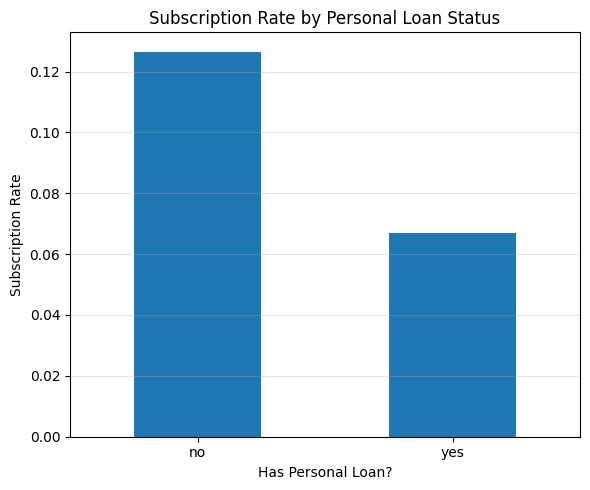

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert target to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Calculate subscription rate by personal loan status
loan_conversion = df.groupby("loan")["subscribed"].mean()

print("Subscription rate by personal loan status:")
print(loan_conversion)

# 4) Create bar chart
plt.figure(figsize=(6, 5))
loan_conversion.plot(kind="bar")

plt.title("Subscription Rate by Personal Loan Status")
plt.xlabel("Has Personal Loan?")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

# 5) Save figure
plt.savefig("png_financialprofile/03_personal_loan_vs_subscription.png", dpi=300)

plt.show()


Question 4. Does having credit in default reduce subscription probability?

#Insights
- Customers with credit in default show significantly lower subscription rates.
- Credit risk status may be a strong indicator of low conversion probability.

Subscription rate by credit default status:
default
no     0.117961
yes    0.063804
Name: subscribed, dtype: float64


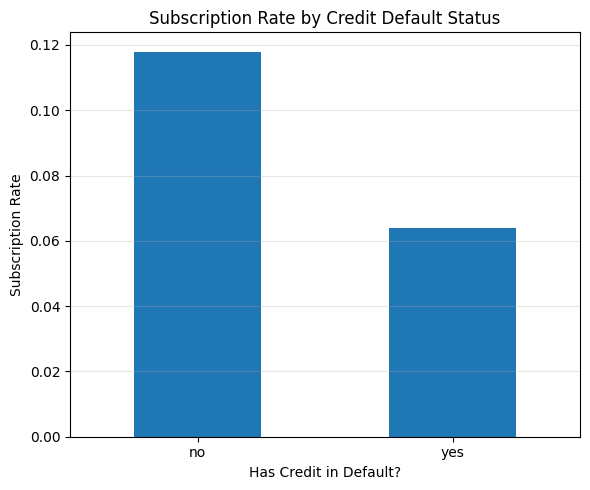

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert subscription target to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Calculate subscription rates by default status
default_conversion = df.groupby("default")["subscribed"].mean()

print("Subscription rate by credit default status:")
print(default_conversion)

# 4) Create bar chart
plt.figure(figsize=(6, 5))
default_conversion.plot(kind="bar")

plt.title("Subscription Rate by Credit Default Status")
plt.xlabel("Has Credit in Default?")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

# 5) Save figure
plt.savefig("png_financialprofile/04_default_vs_subscription.png", dpi=300)

plt.show()

Question 5. Is there an interaction between balance and loan status?

#Insights

If strong interaction:
- High-balance customers without loans have the highest subscription rates.
- Loan status weakens the positive effect of higher balances.

If little interaction:
- Balance increases subscription probability regardless of loan status.
- Loan status does not significantly change the balance effect.

C:\Users\mjars\AppData\Local\Temp\ipykernel_18356\3363463227.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction = df.groupby(["balance_bin", "loan"])["subscribed"].mean().unstack()


Subscription rate by balance quartile and loan status:
loan                      no       yes
balance_bin                           
(-8019.001, 72.0]   0.076031  0.059571
(72.0, 448.0]       0.117660  0.066038
(448.0, 1428.0]     0.134785  0.069235
(1428.0, 102127.0]  0.170809  0.080380


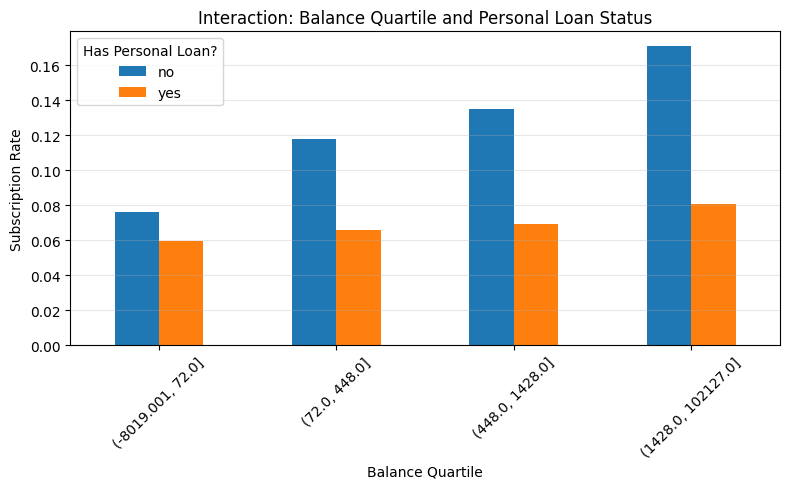

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convertt target to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Create balance quartiles
df["balance_bin"] = pd.qcut(df["balance"], q=4, duplicates="drop")

# 4) Group by balance quartile AND personal loan status
interaction = df.groupby(["balance_bin", "loan"])["subscribed"].mean().unstack()

print("Subscription rate by balance quartile and loan status:")
print(interaction)

# 5) Plot grouped bar chart
interaction.plot(kind="bar", figsize=(8,5))

plt.title("Interaction: Balance Quartile and Personal Loan Status")
plt.xlabel("Balance Quartile")
plt.ylabel("Subscription Rate")
plt.legend(title="Has Personal Loan?")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

# 6) Save figure
plt.savefig("png_financialprofile/05_balance_loan_interaction.png", dpi=300)

plt.show()

6. Can subscription likelihood be linked to other products (e.g., loans)

#Insights
- Housing loans are significantly more common than personal loans in the dataset.
- Customer debt profile is dominated by housing obligations rather than personal loans.

Subscription rates for customers WITH each product:
                   Housing Loan (Yes)  Personal Loan (Yes)  \
Subscription Rate               0.077             0.066814   

                   Credit Default (Yes)  
Subscription Rate              0.063804  


<Figure size 700x500 with 0 Axes>

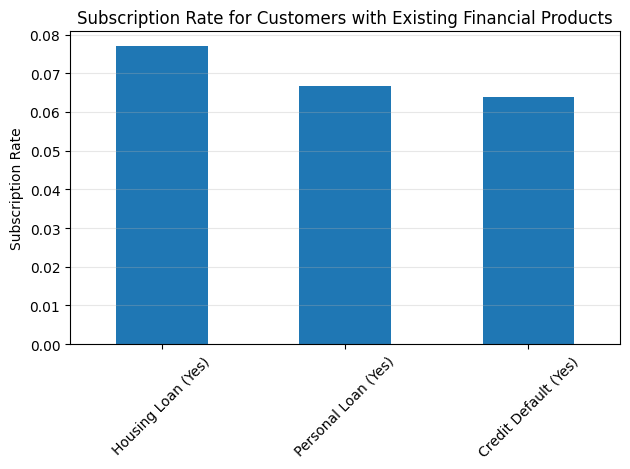

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert subscription to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Calculated subscriptiond rates for each product type
housing_rate = df.groupby("housing")["subscribed"].mean()
personal_rate = df.groupby("loan")["subscribed"].mean()
default_rate = df.groupby("default")["subscribed"].mean()

# 4) Create a comparison table (only "yes" rows for clarity)
comparison = pd.DataFrame({
    "Housing Loan (Yes)": housing_rate["yes"],
    "Personal Loan (Yes)": personal_rate["yes"],
    "Credit Default (Yes)": default_rate["yes"]
}, index=["Subscription Rate"])

print("Subscription rates for customers WITH each product:")
print(comparison)

# 5) Bar chart comparison
plt.figure(figsize=(7,5))
comparison.T.plot(kind="bar", legend=False)

plt.title("Subscription Rate for Customers with Existing Financial Products")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

plt.savefig("png_financialprofile/06_product_link_subscription.png", dpi=300)

plt.show()

7. How many loans are personal vs housing loans?

#Insights
- Housing loans are significantly more common than personal loans in the dataset.
- Customer debt profile is dominated by housing obligations rather than personal loans.

Housing loan counts:
housing
yes    25130
no     20081
Name: count, dtype: int64

Personal loan counts:
loan
no     37967
yes     7244
Name: count, dtype: int64

Loan comparison:
                     Housing Loans  Personal Loans
Number of Customers          25130            7244


<Figure size 600x500 with 0 Axes>

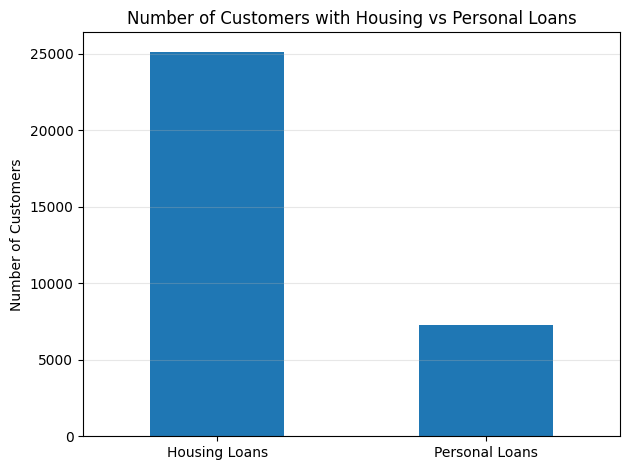

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Count housing loans
housing_counts = df["housing"].value_counts()

# 3) Count personal loans
personal_counts = df["loan"].value_counts()

print("Housing loan counts:")
print(housing_counts)

print("\nPersonal loan counts:")
print(personal_counts)

# 4) Create summary dataframe (only "yes" counts)
loan_summary = pd.DataFrame({
    "Housing Loans": housing_counts["yes"],
    "Personal Loans": personal_counts["yes"]
}, index=["Number of Customers"])

print("\nLoan comparison:")
print(loan_summary)

# 5) Bar chart comparison
plt.figure(figsize=(6,5))
loan_summary.T.plot(kind="bar", legend=False)

plt.title("Number of Customers with Housing vs Personal Loans")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

plt.savefig("png_financialprofile/07_loan_counts_comparison.png", dpi=300)

plt.show()